In [17]:
import numpy as np
from scipy.optimize import newton

def f(x):
    return -x**3 - np.cos(x)

def df(x):
    return -3*x**2 + np.sin(x)  

def newton_fun(*args, **kwargs):
    try:
        return newton(*args, **kwargs)
    except RuntimeError as e:
        return f"{e}"

def false_position(p0, p1, maxiter, tol=1e-5):
    for i in range(maxiter):
        p_next = p1 - f(p1) * (p1 - p0) / (f(p1) - f(p0))
        if abs(f(p_next)) < tol:
            return p_next 
        if f(p0) * f(p_next) < 0:
            p1 = p_next
        else:
            p0 = p_next
    return p_next  

p2_newton = newton_fun(f, x0=-1, fprime=df, maxiter=2)  
p3_secant = newton_fun(f, x0=-1, x1=0, maxiter=3)  
p3_false_position = false_position(-1, 0, maxiter=3)  

print("Newton's method (p2):", p2_newton)
print("Secant method (p3):", p3_secant)
print("False Postion method (p3):", p3_false_position)

Newton's method (p2): Failed to converge after 2 iterations, value is -0.8656841631760818.
Secant method (p3): Failed to converge after 3 iterations, value is -0.8072055385060927.
False Postion method (p3): -0.8625474875571268


Iteration   a           b           p_n         f(a)        f(b)        f(p)        
1           0.500000    1.500000    1.000000    -1.290212   3.271740    -0.034656   
2           1.000000    1.500000    1.250000    -0.034656   3.271740    1.409976    
3           1.000000    1.250000    1.125000    -0.034656   1.409976    0.609080    
4           1.000000    1.125000    1.062500    -0.034656   0.609080    0.266982    
5           1.000000    1.062500    1.031250    -0.034656   0.266982    0.111148    
6           1.000000    1.031250    1.015625    -0.034656   0.111148    0.037003    
7           1.000000    1.015625    1.007812    -0.034656   0.037003    0.000864    
8           1.000000    1.007812    1.003906    -0.034656   0.000864    -0.016973   
9           1.003906    1.007812    1.005859    -0.016973   0.000864    -0.008073   
10          1.005859    1.007812    1.006836    -0.008073   0.000864    -0.003609   
11          1.006836    1.007812    1.007324    -0.003609   0.000

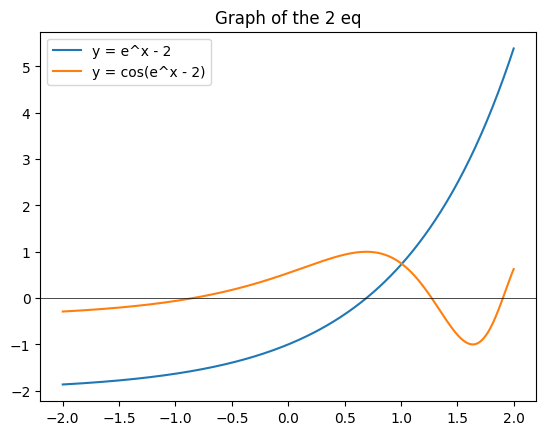

In [29]:
import numpy as np
import matplotlib.pyplot as plt


def bisection_method(func, a, b, tol=1e-5, max_iter=100):
    if func(a) * func(b) >= 0:
        print("The function must have opposite signs at the endpoints a and b.")
        return None
    
    print(f"{'Iteration':<12}{'a':<12}{'b':<12}{'p_n':<12}{'f(a)':<12}{'f(b)':<12}{'f(p)':<12}")
    
    for i in range(max_iter):
        p = (a + b) / 2
        
        f_a = func(a)
        f_b = func(b)
        f_p = func(p)
        
        print(f"{i+1:<12}{a:<12.6f}{b:<12.6f}{p:<12.6f}{f_a:<12.6f}{f_b:<12.6f}{f_p:<12.6f}")
        
        if abs(f_p) < tol:
            return p
        if f_p * f_a < 0:
            b = p
        else:
            a = p
    
    print("Maximum iterations reached")
    return None

def func(x):
    return np.exp(x) - 2 -np.cos(np.exp(x) - 2)

root = bisection_method(func, 0.5, 1.5)
print(f"Root is {root}")

x = np.linspace(-2, 2, 400)
plt.plot(x, np.exp(x) - 2, label='y = e^x - 2')
plt.plot(x, np.cos(np.exp(x) - 2), label='y = cos(e^x - 2)')
plt.axhline(0, color='black', linewidth=0.5)
plt.legend()
plt.title("Graph of the 2 eq")
plt.show()


In [33]:
def fixedpoint_method(func, g, a, tol=1e-5, max_iter=100):
    p=a
 
    print(f"{'Iteration':<12}{'p_n':<12}{'g(p_n)':<12}{'f(p_n)':<12}")
    for i in range(max_iter):
        p_next=g(p)
        f_p=func(p_next)
        print(f"{i+1:<12}{p:<12.6f}{p_next:<12.6f}{f_p:<12.6f}")
        if abs(p_next - p) < tol:
            return p_next
        p=p_next
    print("Maximum iterations reached")
    return None

def func(x):
    return (x**3)-2*x**(2)-5
def g(x):
    return (5/x**2)+2

root = fixedpoint_method(func, g, 2.5)
print(f"Root is {root}")

Iteration   p_n         g(p_n)      f(p_n)      
1           2.500000    2.800000    1.272000    
2           2.800000    2.637755    -0.562658   
3           2.637755    2.718623    0.311278    
4           2.718623    2.676507    -0.153718   
5           2.676507    2.697965    0.080493    
6           2.697965    2.686906    -0.040903   
7           2.686906    2.692572    0.021108    
8           2.692572    2.689660    -0.010807   
9           2.689660    2.691154    0.005556    
10          2.691154    2.690387    -0.002850   
11          2.690387    2.690781    0.001464    
12          2.690781    2.690579    -0.000751   
13          2.690579    2.690683    0.000386    
14          2.690683    2.690629    -0.000198   
15          2.690629    2.690657    0.000102    
16          2.690657    2.690643    -0.000052   
17          2.690643    2.690650    0.000027    
Root is 2.6906498932822


In [40]:
def false_position(p0, p1, maxiter, tol=1e-5):
    
    if f(p0) * f(p1) >= 0:
        print("The function must have opposite signs at the endpoints p0 and p1.")
        return None
    print(f"{'Iteration':<12}{'p0':<12}{'p1':<12}{'p_next':<12}{'f(p0)':<12}{'f(p1)':<12}{'f(p_next)':<12}")
    
    for i in range(maxiter):
        p_next = p1 - f(p1) * (p1 - p0) / (f(p1) - f(p0))
        
        f_p_next = f(p_next)
        
        print(f"{i+1:<12}{p0:<12.6f}{p1:<12.6f}{p_next:<12.6f}{f(p0):<12.6f}{f(p1):<12.6f}{f_p_next:<12.6f}")
        
        if abs(f_p_next) < tol:
            return p_next
        
        if f(p0) * f_p_next < 0:
            p1 = p_next
        else:
            p0 = p_next
    
    return p_next  
def f(x):
    return np.log(x - 1) + np.cos(x - 1)
root = false_position(1.3, 2, maxiter=100)  

print(f"Root is {root}")

Iteration   p0          p1          p_next      f(p0)       f(p1)       f(p_next)   
1           1.300000    2.000000    1.520607    -0.248636   0.540302    0.214758    
2           1.300000    1.520607    1.418368    -0.248636   0.214758    0.042359    
3           1.300000    1.418368    1.401138    -0.248636   0.042359    0.007166    
4           1.300000    1.401138    1.398304    -0.248636   0.007166    0.001181    
5           1.300000    1.398304    1.397840    -0.248636   0.001181    0.000194    
6           1.300000    1.397840    1.397763    -0.248636   0.000194    0.000032    
7           1.300000    1.397763    1.397751    -0.248636   0.000032    0.000005    
Root is 1.3977509211516925


In [42]:
def secant_method(p0, p1, maxiter, tol=1e-5):
    
    print(f"{'Iteration':<12}{'p0':<12}{'p1':<12}{'p_next':<12}{'f(p0)':<12}{'f(p1)':<12}{'f(p_next)':<12}")

    for i in range(maxiter):
        p_next = p1 - f(p1) * (p1 - p0) / (f(p1) - f(p0))
        f_p_next = f(p_next)
        
        print(f"{i+1:<12}{p0:<12.6f}{p1:<12.6f}{p_next:<12.6f}{f_p0:<12.6f}{f_p1:<12.6f}{f_p_next:<12.6f}")
        
        if abs(p_next - p1) < tol:
            return p_next
        
        p0, p1 = p1, p_next
    
    print("Maximum iterations reached")
    return p_next
def f(x):
    return np.log(x - 1) + np.cos(x - 1)
root = false_position(1.3, 2, maxiter=100)  

print(f"Root is {root}")

Iteration   p0          p1          p_next      f(p0)       f(p1)       f(p_next)   
1           1.300000    2.000000    1.520607    -0.248636   0.540302    0.214758    
2           1.300000    1.520607    1.418368    -0.248636   0.214758    0.042359    
3           1.300000    1.418368    1.401138    -0.248636   0.042359    0.007166    
4           1.300000    1.401138    1.398304    -0.248636   0.007166    0.001181    
5           1.300000    1.398304    1.397840    -0.248636   0.001181    0.000194    
6           1.300000    1.397840    1.397763    -0.248636   0.000194    0.000032    
7           1.300000    1.397763    1.397751    -0.248636   0.000032    0.000005    
Root is 1.3977509211516925


In [60]:
def newton_method(p0,maxiter,tol=1e-5):
    print(f"{'Iteration':<12}{'p_n':<12}{'f(p_n)':<12}{'f\'(p_n)':<12}")
    for i in range(maxiter):
        f_p = f(p0)
        df_p = df(p0)
        if df(p0) == 0:
            print ("Derivative is 0. Failed")
            return None
        
        p_next=p0-f(p0)/df(p0)
        print(f"{i+1:<12}{p0:<12.6f}{f_p:<12.6f}{df_p:<12.6f}")
        if np.isnan(p_next):
            print ("Newton Method failed")
            return None
        if abs(p_next-p0)<tol:
            return p_next
        p0=p_next
    print("Maximum iterations reached")
    return p_next

def f(x):
    return np.log(x - 1) + np.cos(x - 1)
def df(x):
    return (1/x-1)-np.sin(x-1)

root = newton_method(1.45, maxiter=100)  

print(f"Root is {root}")

Iteration   p_n         f(p_n)      f'(p_n)     
1           1.450000    0.101939    -0.745310   
2           1.586774    0.299616    -0.923469   
3           1.911221    0.519811    -1.267027   
4           2.321482    0.525493    -1.538322   
5           2.663083    0.416517    -1.620240   
6           2.920155    0.310111    -1.597145   
7           3.114320    0.231578    -1.534794   
8           3.265206    0.177734    -1.462172   
9           3.386760    0.141550    -1.389899   
10          3.488603    0.117451    -1.320916   
11          3.577519    0.101743    -1.255110   
12          3.658582    0.092192    -1.191118   
13          3.735982    0.087629    -1.126913   
14          3.813742    0.087779    -1.059800   
15          3.896567    0.093395    -0.985945   
16          3.991294    0.106980    -0.899188   
17          4.110268    0.135199    -0.788027   
18          4.281835    0.198220    -0.626673   
19          4.598141    0.382837    -0.341669   
20          5.718634

C:\Users\Audrie Lex Afundar\AppData\Local\Temp\ipykernel_154236\1641386075.py:22: RuntimeWarning: invalid value encountered in log
  return np.log(x - 1) + np.cos(x - 1)
